In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)
#그래프의 폰트사이즈 고정

import missingno as msno
'''
파이썬 missingno 패키지는 pandas 데이터프레임 데이터에서 
누락된 데이터를 찾고 시각화하는 기능을 제공하는 패키지입니다.
'''

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
'''
이 명령을 사용하면 그래프가 
Jupyter Notebook의 셀 내부에 표시되며 
별도의 창으로 열리지 않습니다.
'''     


'\n이 명령을 사용하면 그래프가 \nJupyter Notebook의 셀 내부에 표시되며 \n별도의 창으로 열리지 않습니다.\n'

In [114]:
'''
기본 프로세스 목록
1. 데이터셋 확인
2. eda
3. feature engineering
4. model building
5. learning & prediction
6. evaluation
'''

'\n기본 프로세스 목록\n1. 데이터셋 확인\n2. eda\n3. feature engineering\n4. model building\n5. learning & prediction\n6. evaluation\n'

In [115]:
# 1. 데이터 셋 확인

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')   

In [116]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
df_train.describe()

#age에 null값이 많음이 보인다.
#그래프로 시각화 해보자.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
#1.1 null data check

for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of Nan value : {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

#단순 문자열 포매팅

column : PassengerId	 Percent of Nan value : 0.00%
column :   Survived	 Percent of Nan value : 0.00%
column :     Pclass	 Percent of Nan value : 0.00%
column :       Name	 Percent of Nan value : 0.00%
column :        Sex	 Percent of Nan value : 0.00%
column :        Age	 Percent of Nan value : 19.87%
column :      SibSp	 Percent of Nan value : 0.00%
column :      Parch	 Percent of Nan value : 0.00%
column :     Ticket	 Percent of Nan value : 0.00%
column :       Fare	 Percent of Nan value : 0.00%
column :      Cabin	 Percent of Nan value : 77.10%
column :   Embarked	 Percent of Nan value : 0.22%


In [119]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of Nan value : {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

#단순 문자열 포매팅

column : PassengerId	 Percent of Nan value : 0.00%
column :     Pclass	 Percent of Nan value : 0.00%
column :       Name	 Percent of Nan value : 0.00%
column :        Sex	 Percent of Nan value : 0.00%
column :        Age	 Percent of Nan value : 20.57%
column :      SibSp	 Percent of Nan value : 0.00%
column :      Parch	 Percent of Nan value : 0.00%
column :     Ticket	 Percent of Nan value : 0.00%
column :       Fare	 Percent of Nan value : 0.24%
column :      Cabin	 Percent of Nan value : 78.23%
column :   Embarked	 Percent of Nan value : 0.00%


In [120]:
'''
분석결과:
train, test set에서 age의 20%, cabin의 77%, embarked(train) 0.22퍼가 손실됨
'''

'\n분석결과:\ntrain, test set에서 age의 20%, cabin의 77%, embarked(train) 0.22퍼가 손실됨\n'

<Axes: >

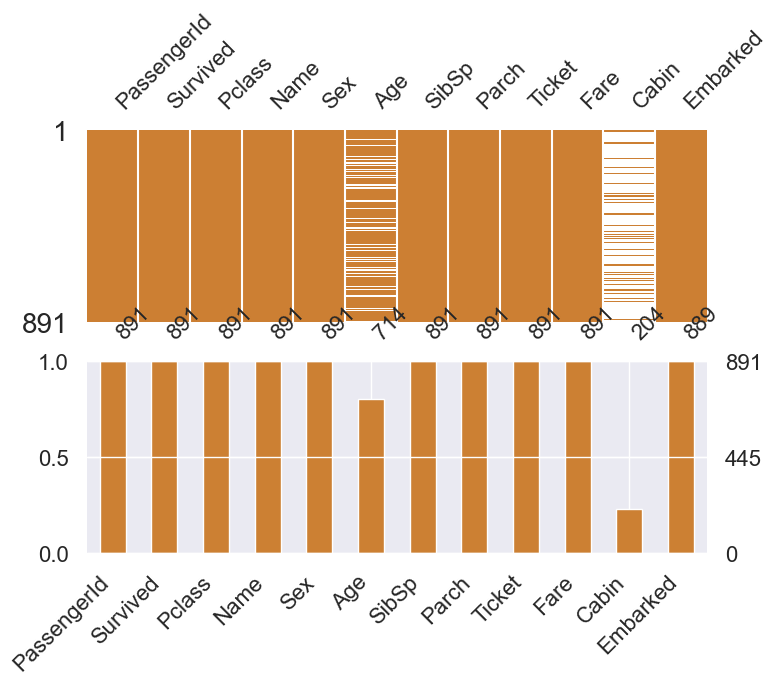

In [121]:
#missingno pkg 사용하여 시각화
fig, axes = plt.subplots(2,1)
msno.matrix(df = df_train.iloc[:,:], figsize= (6,6), color = (0.8, 0.5, 0.2), ax = axes[0])
msno.bar(df = df_train.iloc[:,:], figsize= (6,6), color = (0.8, 0.5, 0.2), ax = axes[1])


<Axes: >

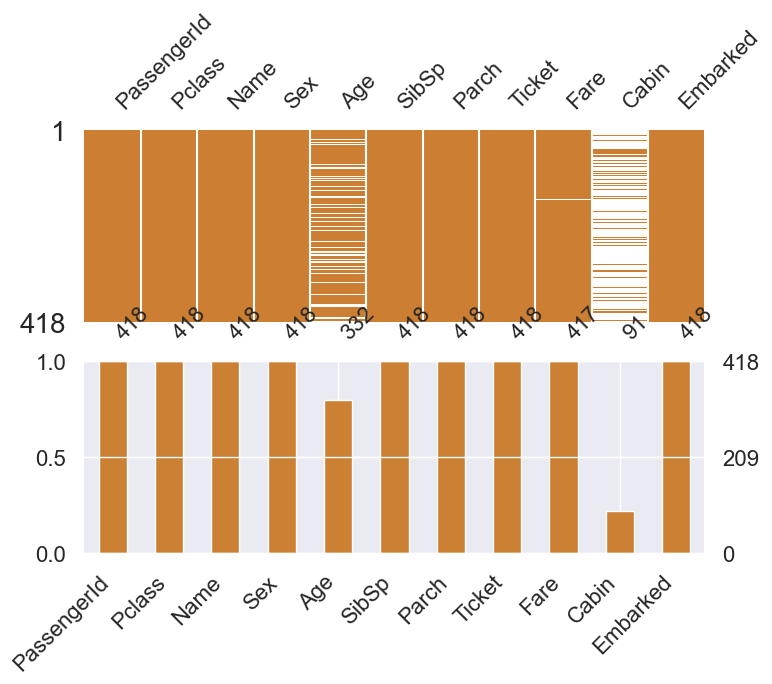

In [122]:
#missingno pkg 사용하여 시각화
fig, axes = plt.subplots(2,1)
msno.matrix(df = df_test.iloc[:,:], figsize= (6,6), color = (0.8, 0.5, 0.2), ax = axes[0])
msno.bar(df = df_test.iloc[:,:], figsize= (6,6), color = (0.8, 0.5, 0.2), ax = axes[1])


Text(0.5, 1.0, 'Count plot - Survived')

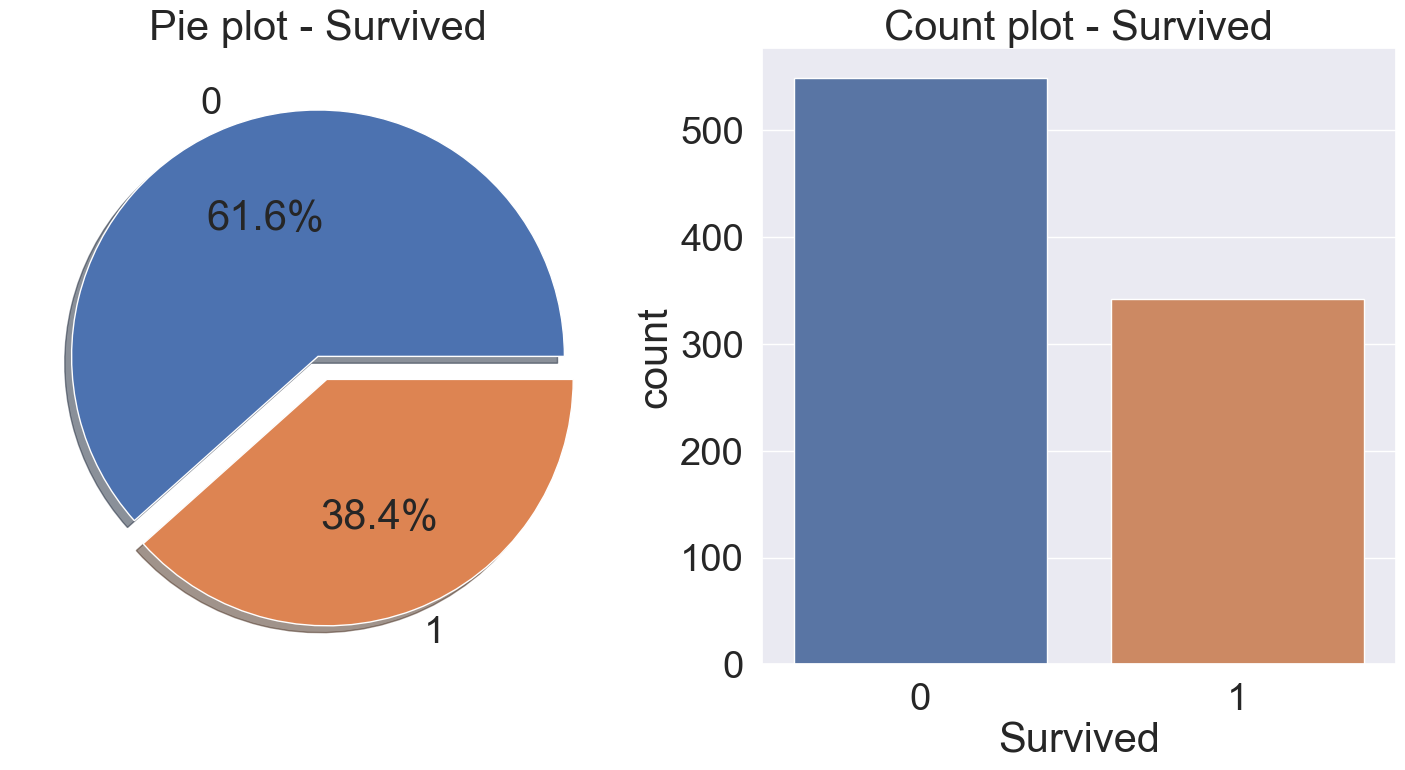

In [123]:
#1.2 target label 확인
## target label의 dist가 어떠한가?
## binary classification에서는 1,0 분포에 따라 방법이 달라질 수 있음

f, ax = plt.subplots(1,2, figsize = (18,8))
df_train.Survived.value_counts().plot.pie(explode = [0, 0.1 ], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x= 'Survived', data=df_train , ax=ax[1]) #왜 원하는대로 안나오지?
ax[1].set_title('Count plot - Survived')

In [124]:
'''
생사비율 4:6
나름 균일한 데이터이다. - balanced                      
'''

'\n생사비율 4:6\n나름 균일한 데이터이다. - balanced                      \n'

        Survived
Pclass          
1            216
2            184
3            491
Axes(0.125,0.11;0.775x0.77)


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


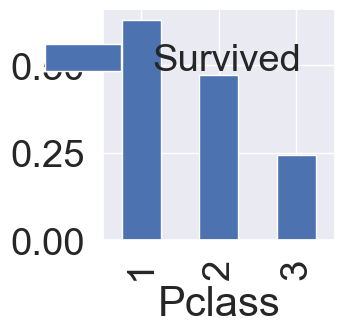

In [125]:
#2. EDA
##2.1 pclass

print(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count())
print(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().plot.bar(figsize = (3,3)))


#pd.crosstab을 사용해도됨
pd.crosstab(df_train.Pclass, df_train.Survived, margins = True).style.background_gradient(cmap = 'summer_r')



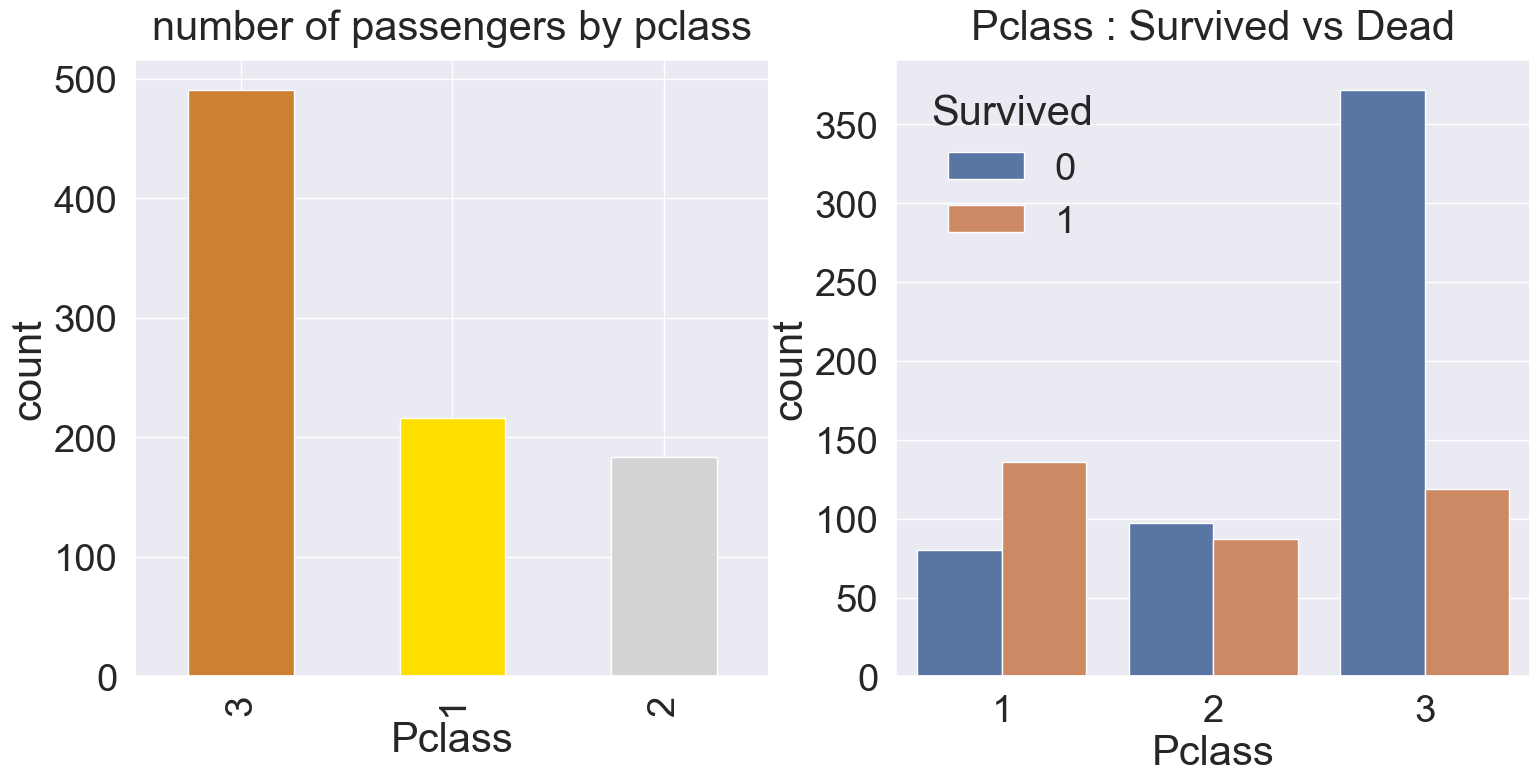

In [126]:
# sns.countplot을 이용한 시각화
y_position = 1.02
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train.Pclass.value_counts().plot.bar(color = ['#CD7F32', '#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('number of passengers by pclass', y = y_position)
ax[0].set_ylabel('count')

sns.countplot( x = 'Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

#as_index인자는 pclass의 index 사용 여부
# 숫자는 3등석 생존자가 많으나, 비율은 상위좌석일수록 생존확률이 높다


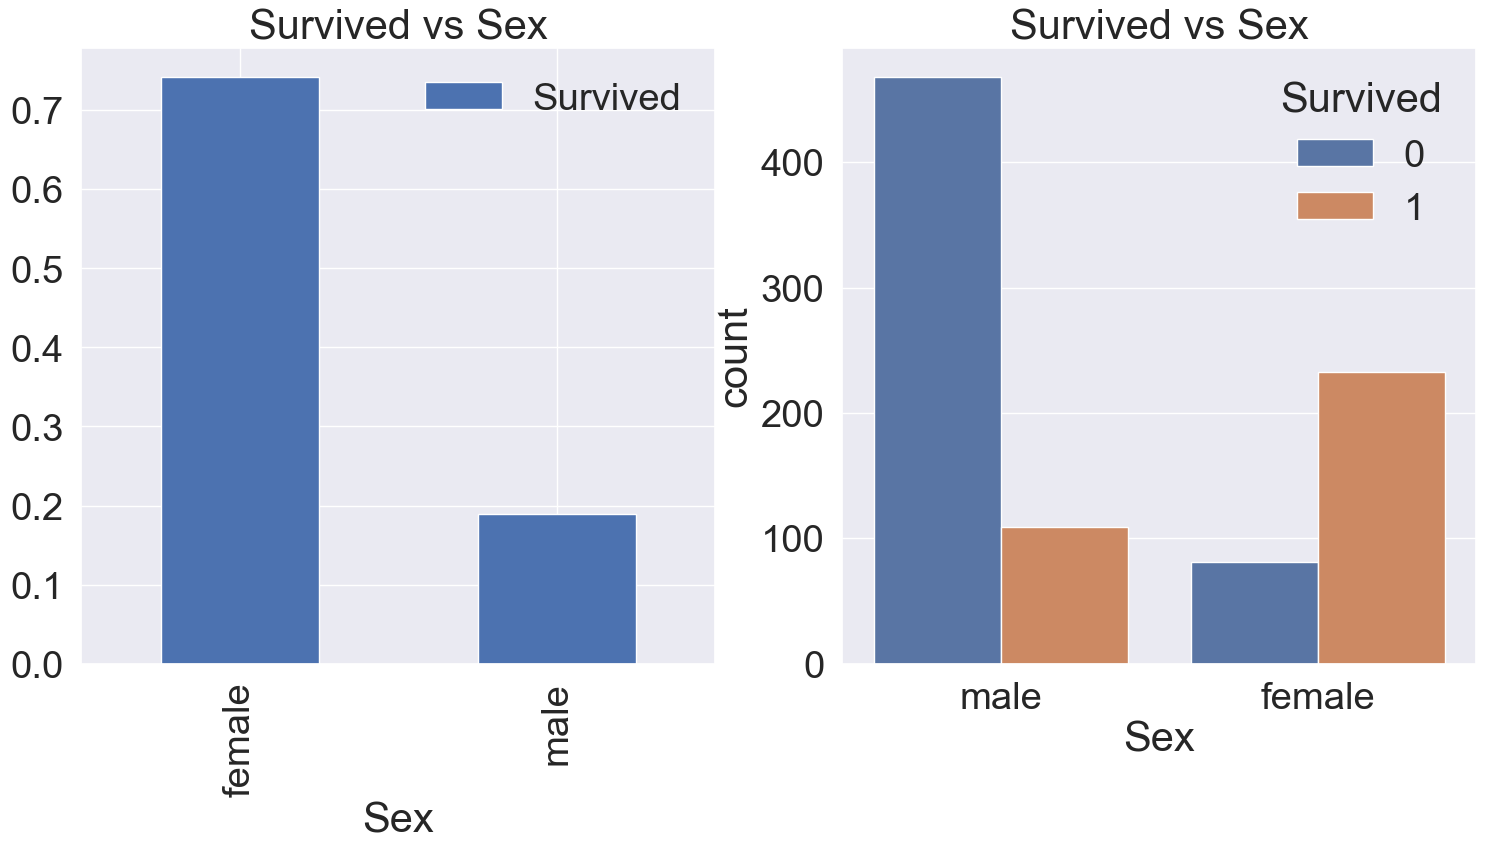

In [127]:
#2.2 sex

f, ax=  plt.subplots(1,2, figsize = (18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x = 'Sex', hue = 'Survived' , data = df_train, ax = ax[1])
ax[1].set_title('Survived vs Sex')

plt.show()

#여성의 생존률이 남성에 비해 훨씬 높다.

In [128]:
print(df_train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by = 'Survived', ascending = False))
pd.crosstab(df_train['Sex'], df_train['Survived'])

#여성의 생존률이 훨씬 높다.

        Survived
Sex             
female  0.742038
male    0.188908


Survived,0,1
Sex,,
female,81,233
male,468,109


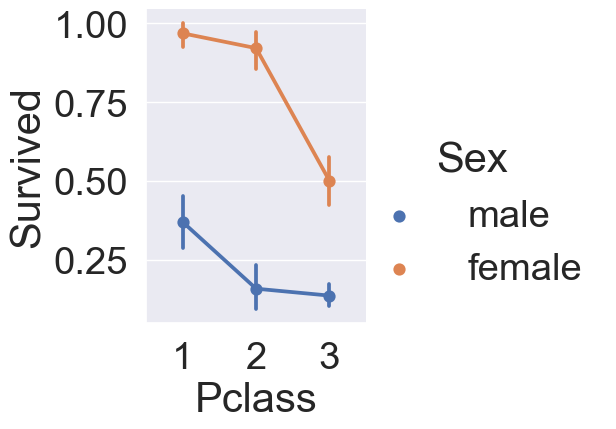

In [129]:
#2.3 both sex and pclass : 변수상호관계 분석
sns.catplot(x= 'Pclass', y = 'Survived', hue = 'Sex', data =df_train, kind = 'point')

# 모든 class에서 여성의 생존비율이 더 높다.

In [130]:
#2.4 age
print('max : {:.1f}'.format(df_train.Age.max()))
print('min : {:.1f}'.format(df_train.Age.min()))
print('mean : {:.1f}'.format(df_train.Age.mean()))

max : 80.0
min : 0.4
mean : 29.7


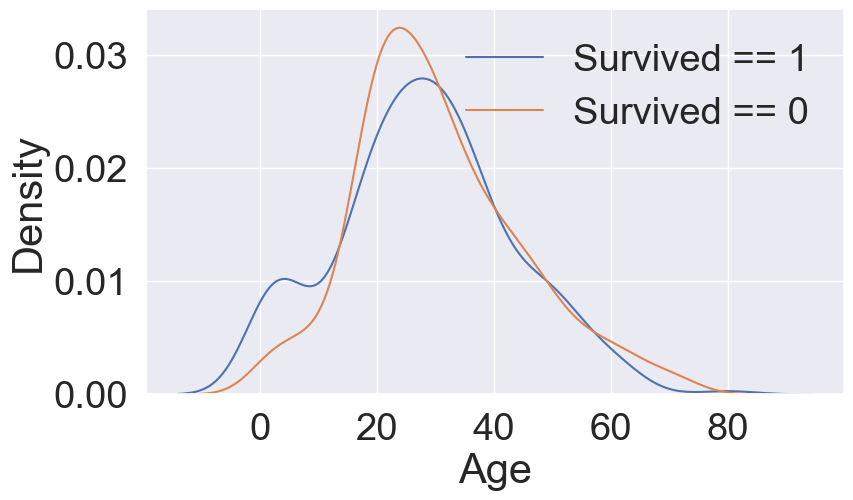

In [131]:
# 생존에 따른 age의 히스토그램 그려보기

fig, ax = plt.subplots(1,1, figsize = (9,5))
sns.kdeplot(df_train[df_train.Survived == 1].Age, ax = ax)
sns.kdeplot(df_train[df_train.Survived == 0].Age, ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])

#kdeplot은 kernel density estimation을 의미함.
#  생존자 중 어린이바율이 더 높다

'\n등급수가 높은 좌석일수록 연령층이 높은 경향이 있음\n그렇다면, 나이대에 따른 생존률은?\n\n'

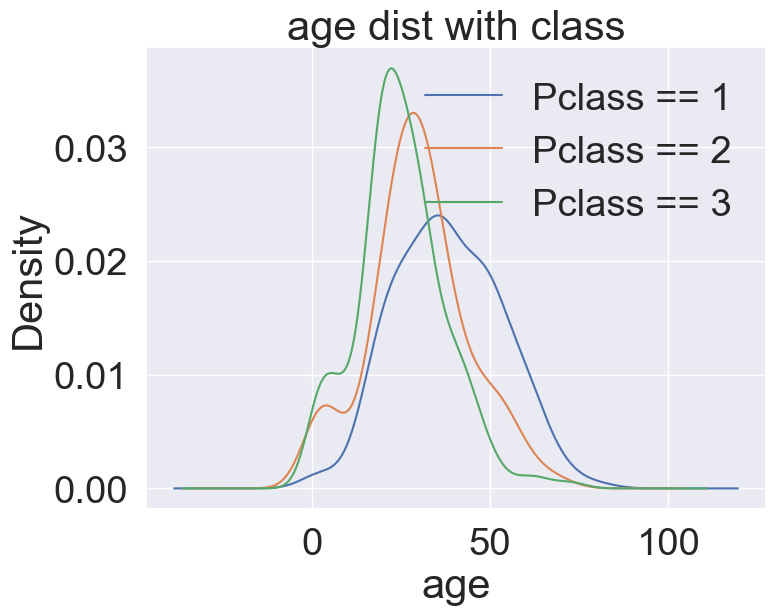

In [132]:
#클래스 별로 나이분포
plt.figure(figsize = (8,6))
df_train[df_train.Pclass == 1].Age.plot(kind = 'kde')
df_train[df_train.Pclass == 2].Age.plot(kind = 'kde')
df_train[df_train.Pclass == 3].Age.plot(kind = 'kde')

plt.xlabel('age')
plt.title('age dist with class')
plt.legend(['Pclass == 1', 'Pclass == 2','Pclass == 3'])


'''
등급수가 높은 좌석일수록 연령층이 높은 경향이 있음
그렇다면, 나이대에 따른 생존률은?

'''



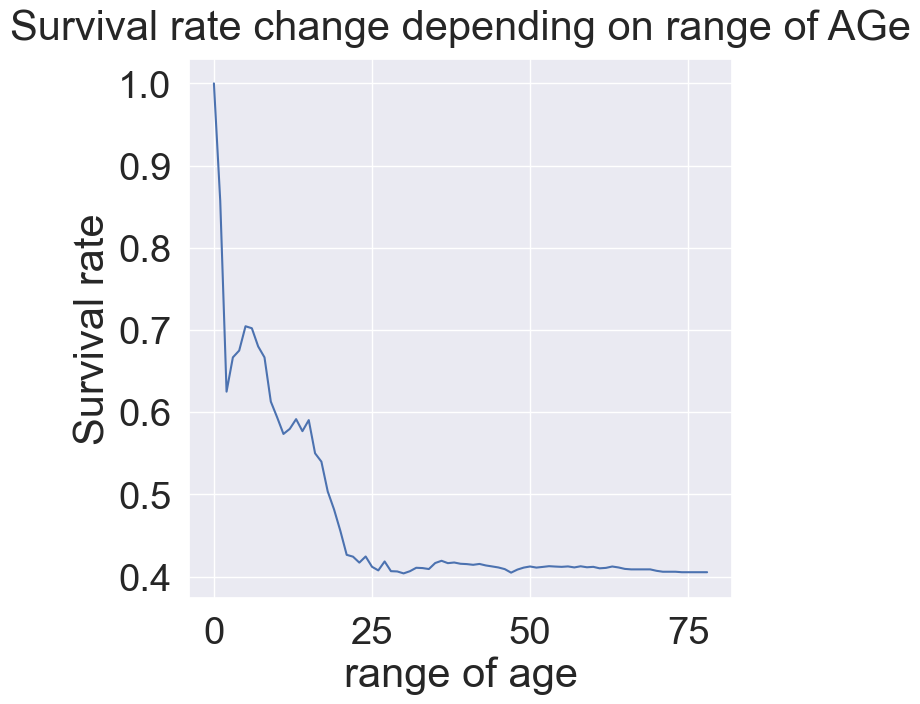

In [133]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train.Age < i].Survived.mean())

plt.figure(figsize = (7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of AGe', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('range of age')
plt.show()

#굳이 cummlate를 사용하는 이유: 
#나이대별로 사람이 얼마나 많은지 몰라서 나이와 survived와의 관계를 확신할 수 없음.
# 쨋든 어릴수록 생존률이 높다.

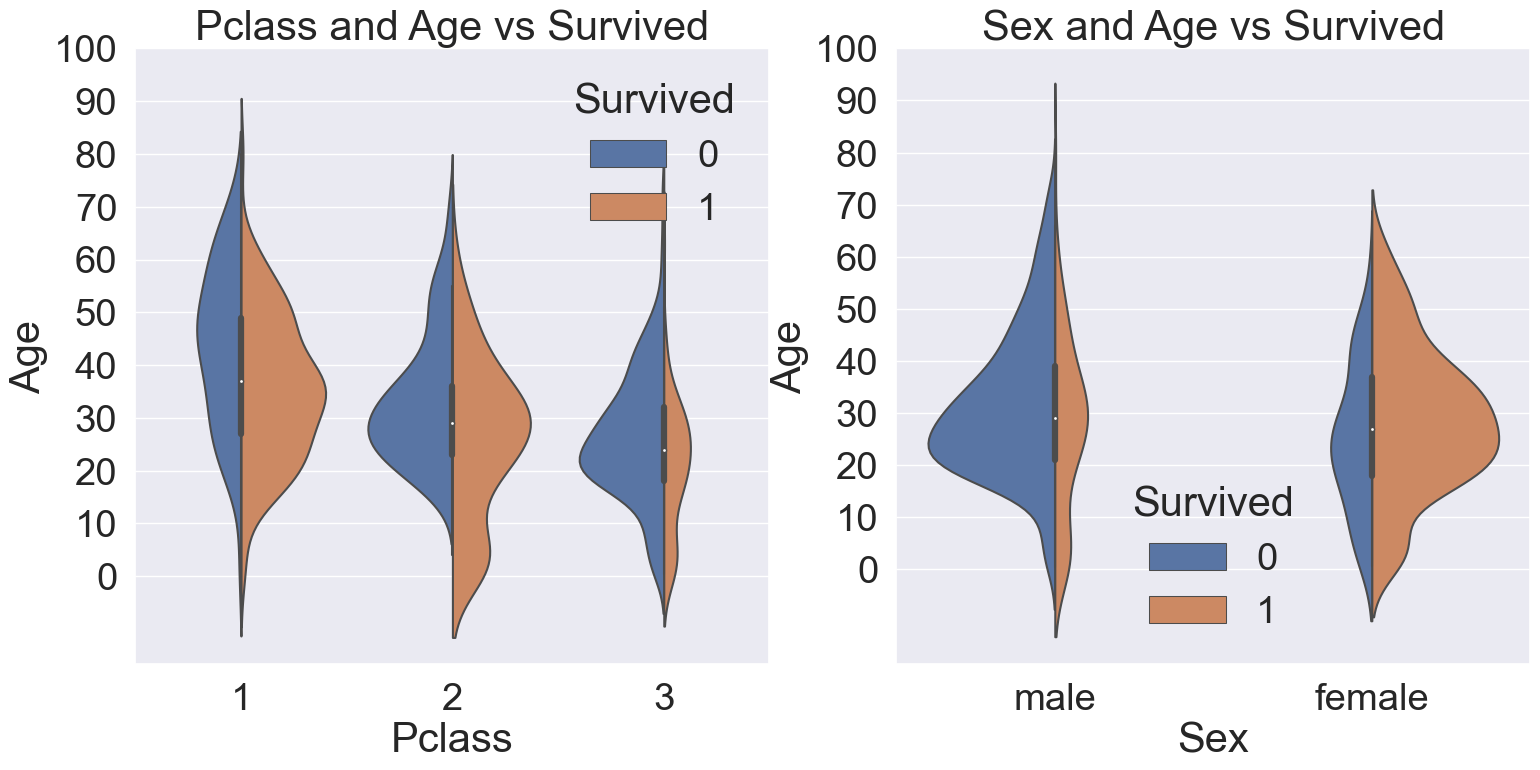

In [134]:
# 2.5 Pclass, Sex, Age

f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x=  "Sex",y = "Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<Axes: xlabel='Embarked'>

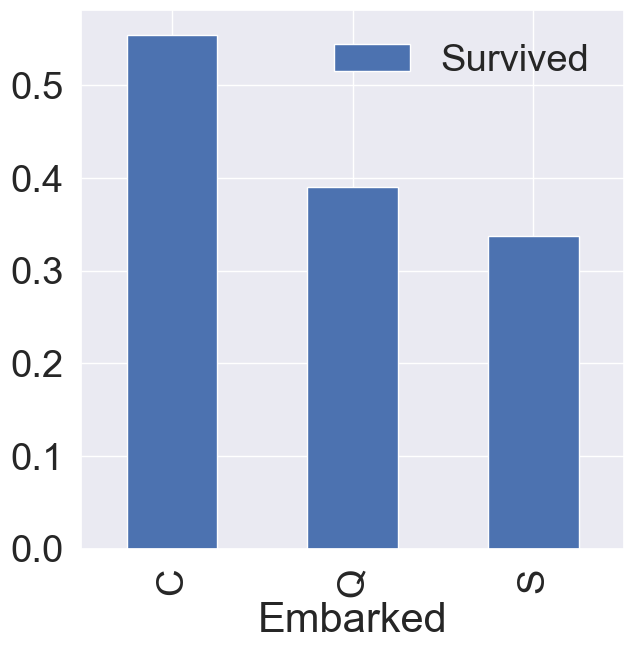

In [135]:
#2.6 Embarked
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

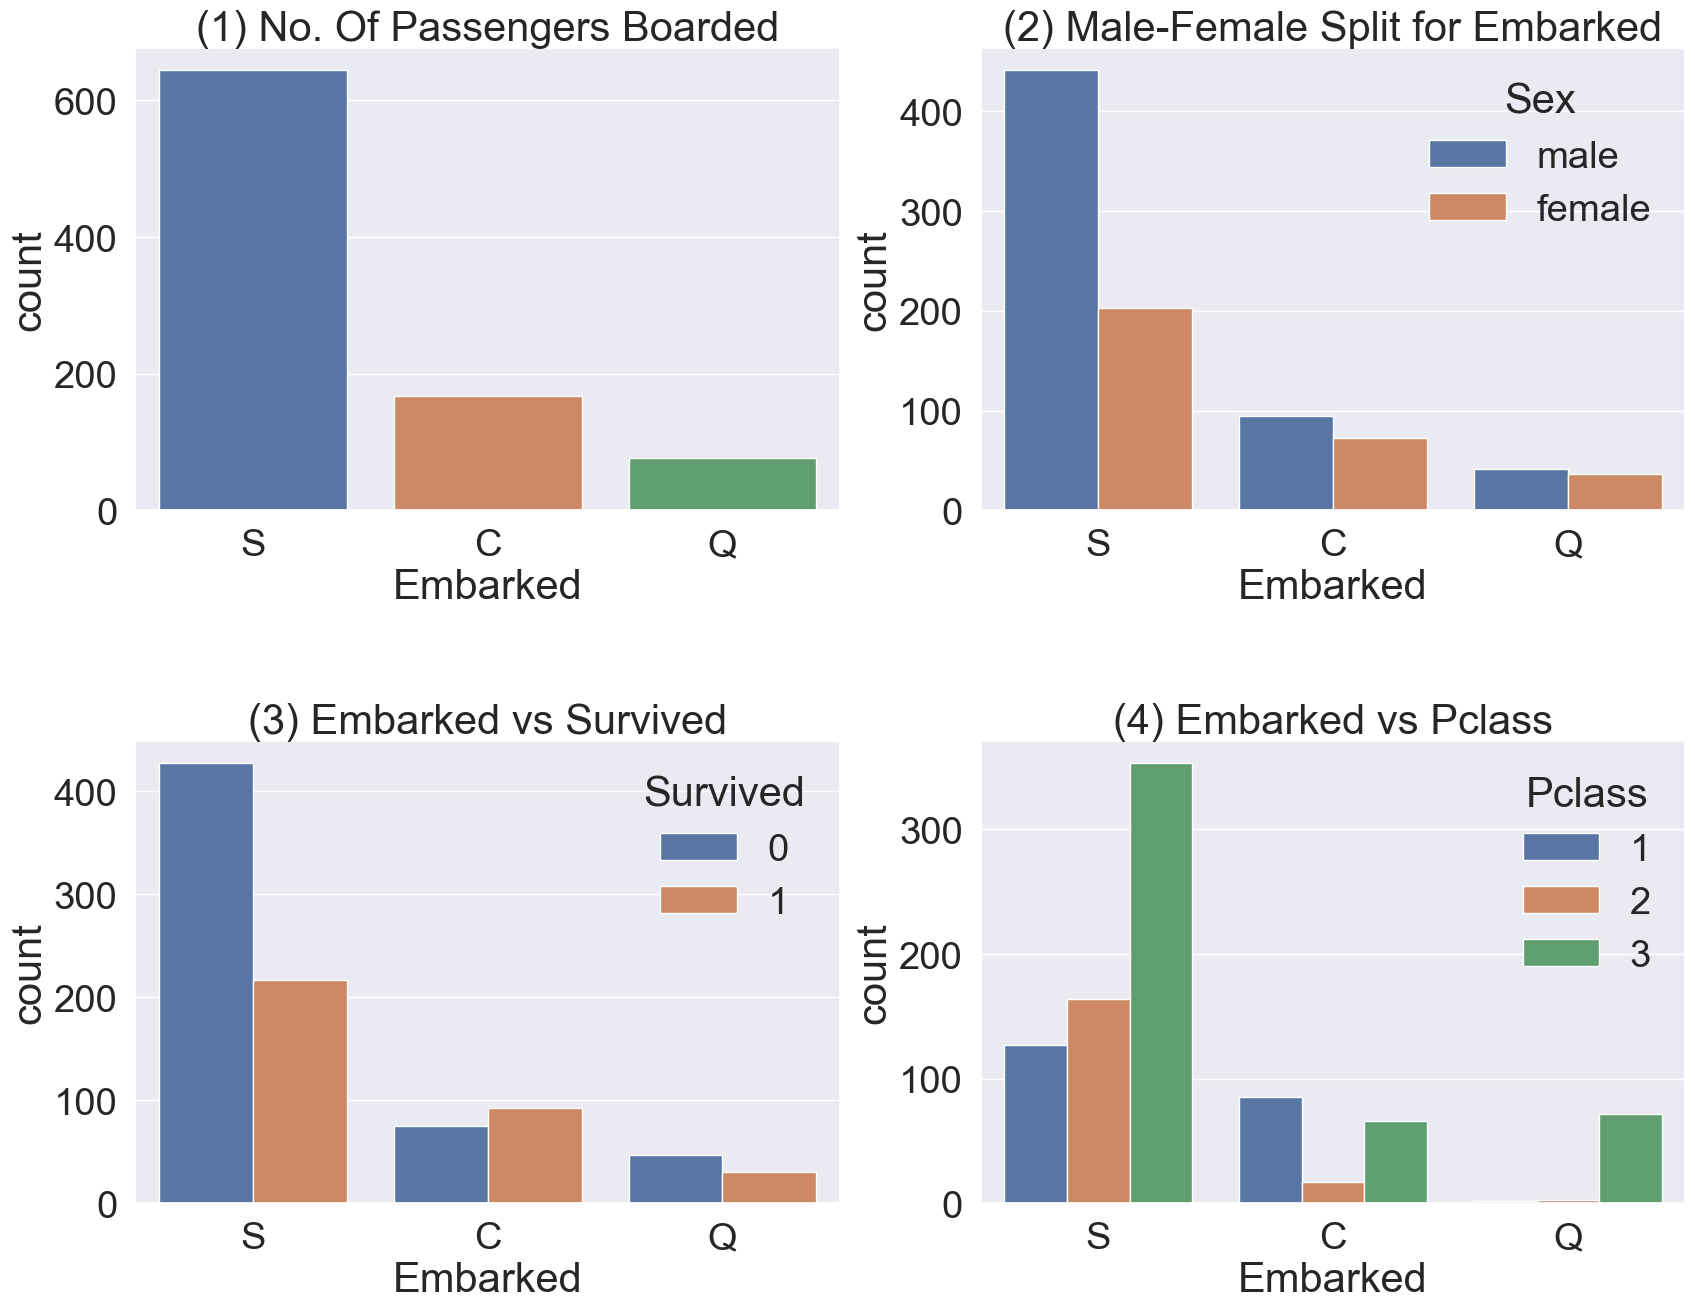

In [136]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x = 'Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x = 'Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x = 'Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x = 'Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [137]:
""" 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀) """

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


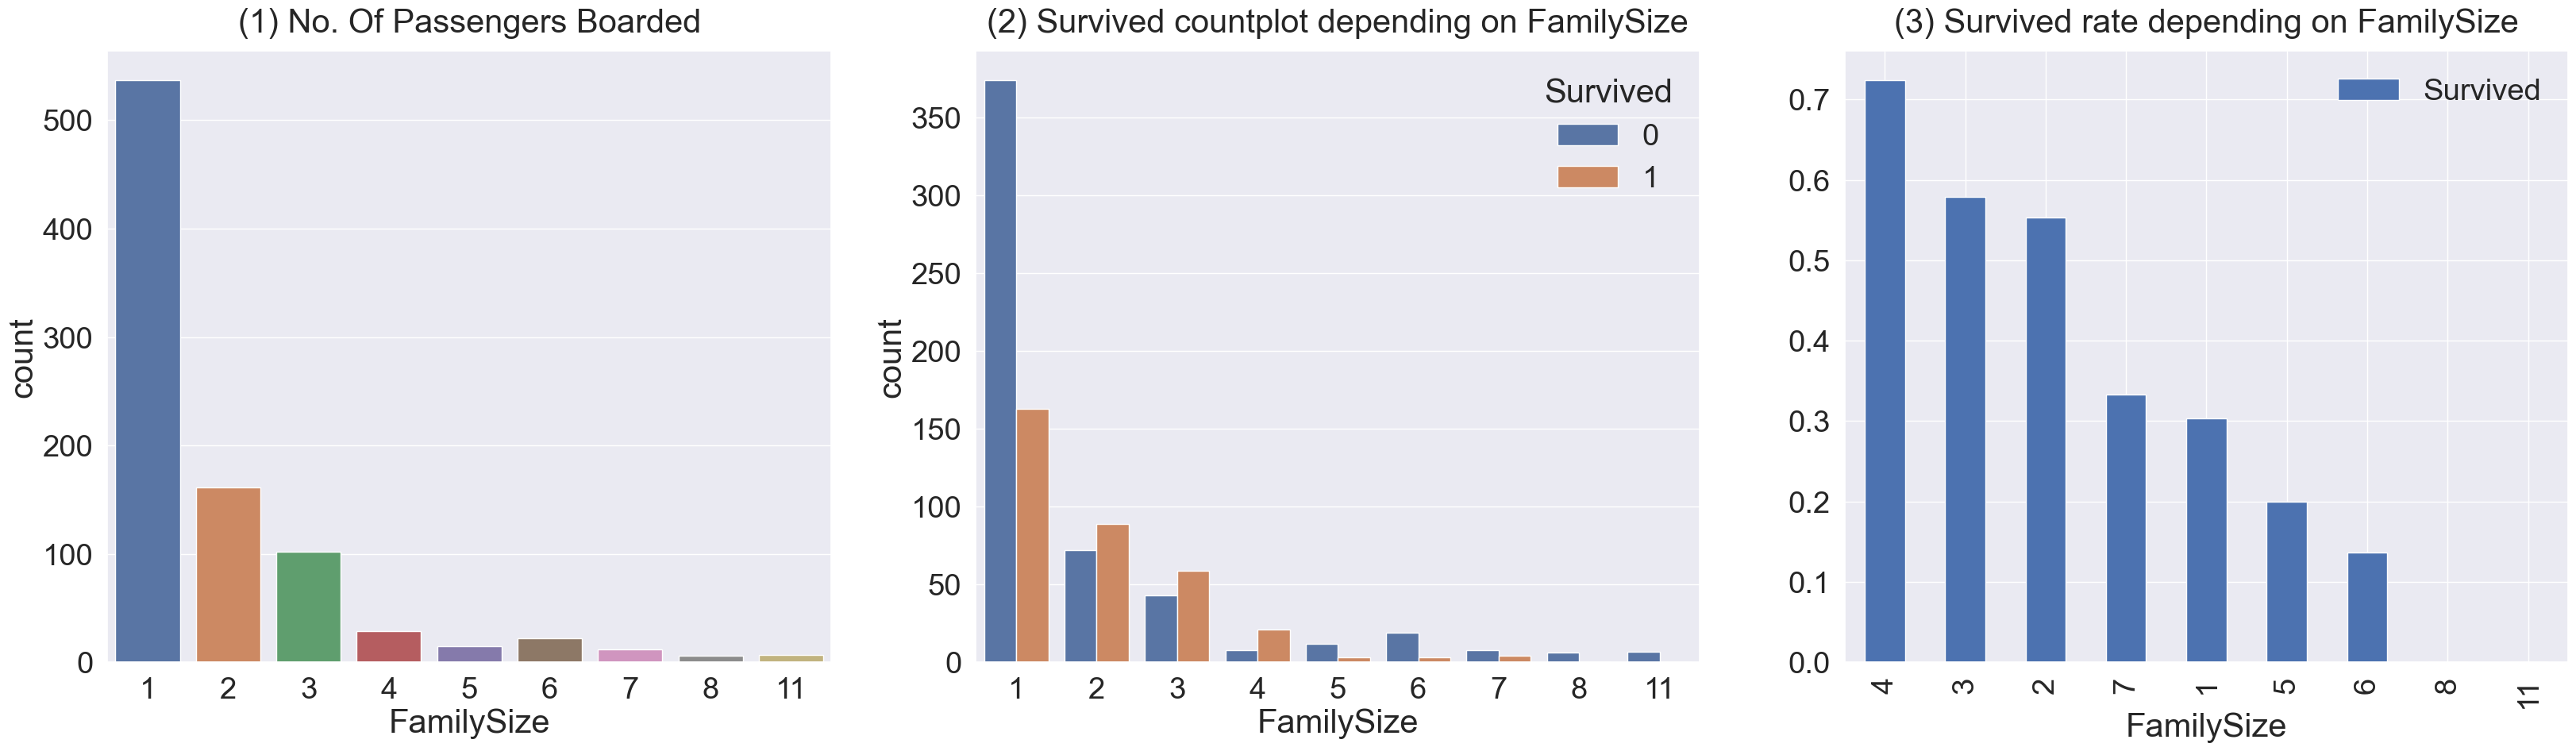

In [138]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x = 'FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x = 'FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 3~4 명 선에서 생존확률이 높아진다.

Text(0.5, 0, 'Fare')

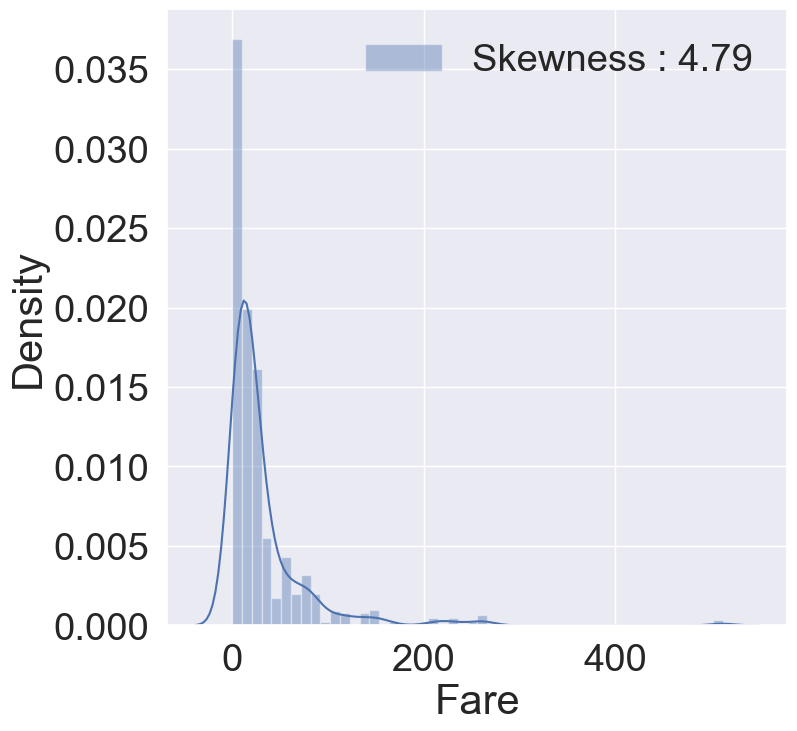

In [139]:
""" 2.8 fare """
fig, ax = plt.subplots(1,1, figsize= (8,8))
g = sns.distplot(x = df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train.Fare.skew()), ax = ax)
g = g.legend(loc = 'best')
ax.set_xlabel('Fare')

#매우 비대칭적인 분포
#outlier의 영향을 줄이기 위해 log를 취한다.
#

In [140]:
#fare 에 대한 로그변환

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_train.Fare = df_train.Fare.map(lambda i : np.log(i) if i > 0 else 0)

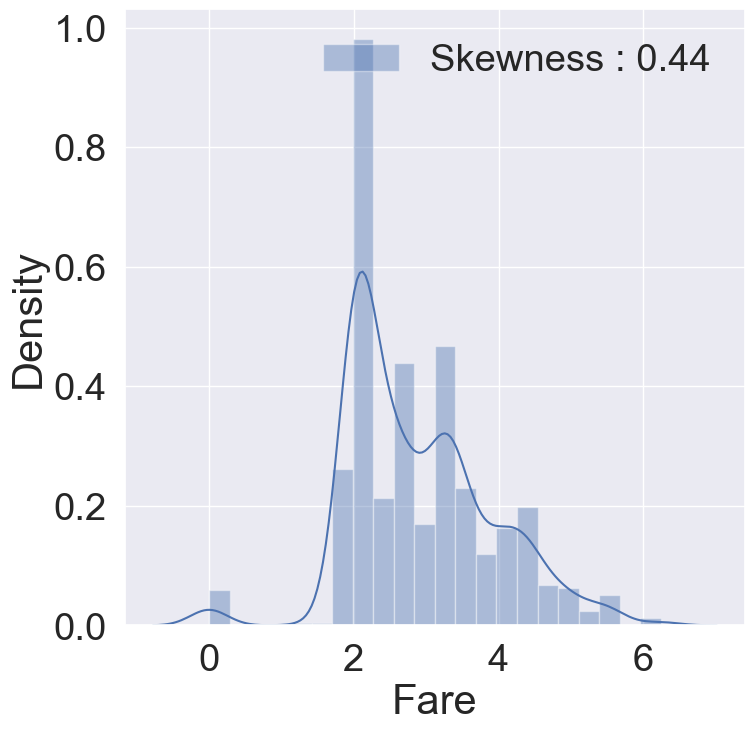

In [141]:
fig, ax = plt.subplots(1,1, figsize= (8,8))
g = sns.distplot(df_train.Fare, color ='b', label = 'Skewness : {:.2f}'.format(df_train.Fare.skew()), ax = ax)
g = g.legend(loc = 'best')

#이제 나름 균등해졌다.사실 이는 feature engineering의 일종임



In [142]:
#2.9 cabin : null값이 80퍼가량. 모델에 포함시키지는 않겠다.
#2.10 ticket

df_train.Ticket.value_counts()
#어떠한 정보를 추출할 수 있을까?
#티켓번호가 동일하다는 것은 무슨의미일까

df_train
# 맨 처음 숫자는 pclass의미.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.564949,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.154870,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.401197,C148,C,1


In [143]:
# 결측값 처리
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [144]:
# curriculum 1-2 : ensemble modeling

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style = 'white', context = 'notebook', palette = 'deep')

In [145]:
# Load data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
IDtest = test['PassengerId']

In [146]:
#2.2 outlier detection using Tukey method

def detect_outliers(df, n, features):
    outlier_indices = []

    # iterate over features
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        outlier_indices.extend(outlier_list_col) # 리스트에 리스트를 붙여 리스트를 확장함.
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

Outliers_to_drop = detect_outliers(train, 2, ['Age','SibSp','Parch','Fare'])

In [147]:
train.loc[Outliers_to_drop] # outlier rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [148]:
# drop outliers

train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop = True)

In [149]:
#2.3 joining train and test set  ? 합친 이유?
train_len = len(train)
dataset = pd.concat(objs = [train, test], axis = 0).reset_index(drop = True)

In [150]:
# fill empty and nans values with nan - test set의 survived를 대체하기 위해 사용됨 to nan(test set에 survived column이 없었기 때문)

dataset = dataset.fillna(np.nan)

dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [151]:
# infos

train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

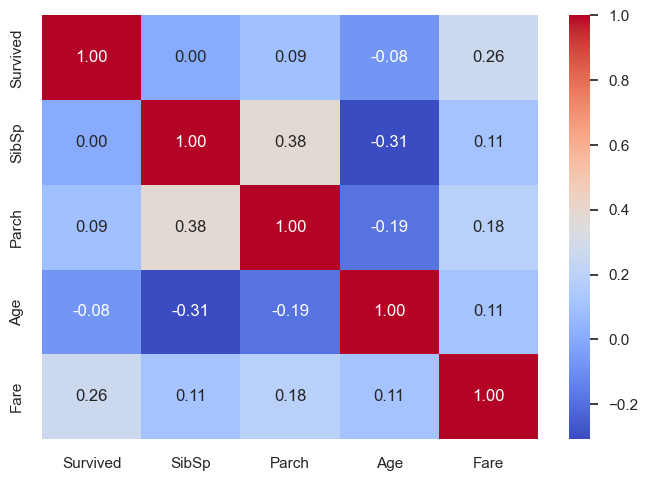

In [152]:
# 3. feature analysis
# 3.1 numerical values
# correlation matrix between numerical values

g = sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

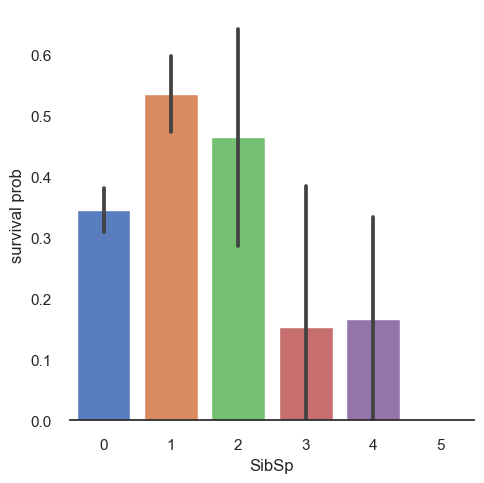

In [153]:
# SibSp

g = sns.catplot(x = 'SibSp',y = 'Survived', data = train, kind = 'bar', palette = 'muted')
g.despine(left = True) #의미?
g = g.set_ylabels('survival prob')

# sibsp가 적으면 생존확률이 높은 양상

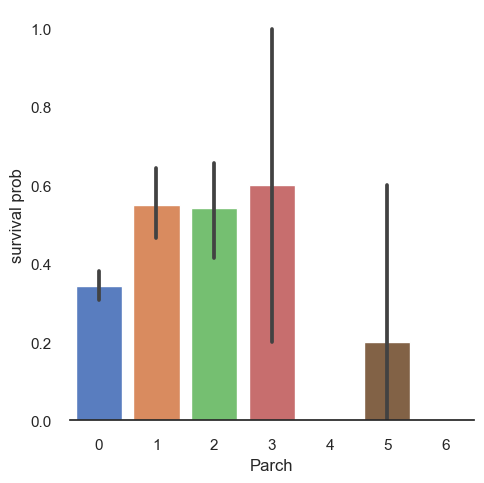

In [154]:
# parch

g = sns.catplot(x = 'Parch',y = 'Survived', data = train, kind = 'bar', palette = 'muted')
g.despine(left = True) #의미?
g = g.set_ylabels('survival prob')

#123 이 가장 높음
# 3,5 의 분산이 크다.

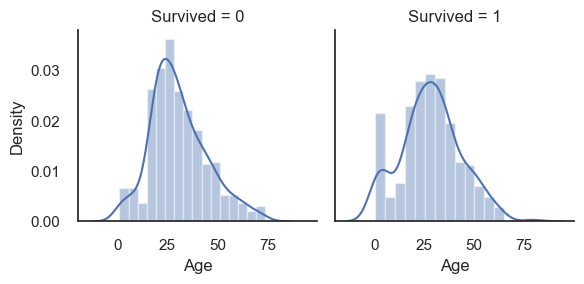

In [155]:
#age

g = sns.FacetGrid(train, col = 'Survived') # col 나눔
g = g.map(sns.distplot, 'Age') # 각 grid 별로 그림그리기

# 아기를 먼저 챙겼다. 생존자들이 비교적 어리다

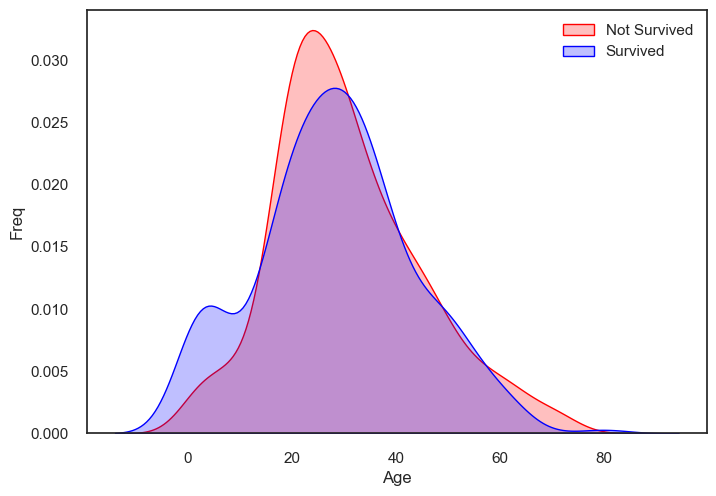

In [156]:
# explore age distribution

g = sns.kdeplot(train['Age'][(train['Survived'] == 0) & (train['Age'].notnull())], color = 'Red', shade = True)
g = sns.kdeplot(train['Age'][(train['Survived'] == 1) & (train['Age'].notnull())], color = 'Blue', shade = True)
g.set_xlabel('Age')
g.set_ylabel('Freq')
g = g.legend(['Not Survived', 'Survived'])

#&(비트연산) 와 and(논리연산)의 차이.

# 아이를 챙겼음이 확인됨.

In [157]:
#Fare

dataset.Fare.isnull().sum()

1

In [158]:
dataset.Fare = dataset.Fare.fillna(dataset.Fare.median())

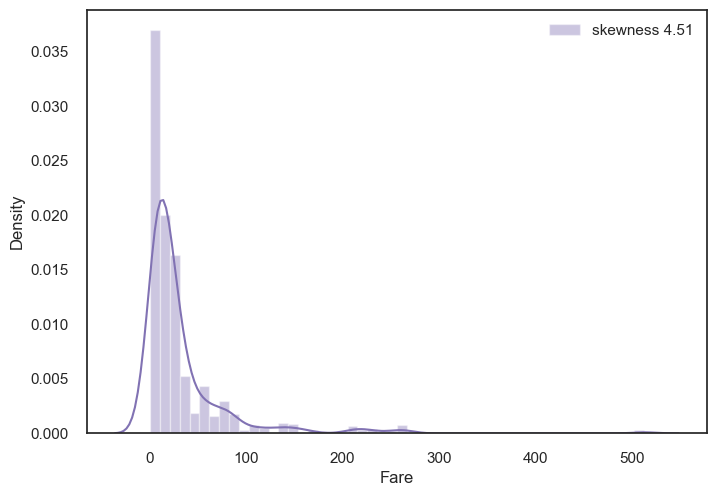

In [159]:
# Fare distribution

g = sns.distplot(dataset.Fare, color = 'm', label = 'skewness %.2f'%(dataset.Fare.skew()))
g = g.legend(loc = 'best')

# 왜도가 너무세다. transform 요구됨.

In [160]:
dataset.Fare = dataset.Fare.map(lambda i : np.log(i) if i > 0 else 0)

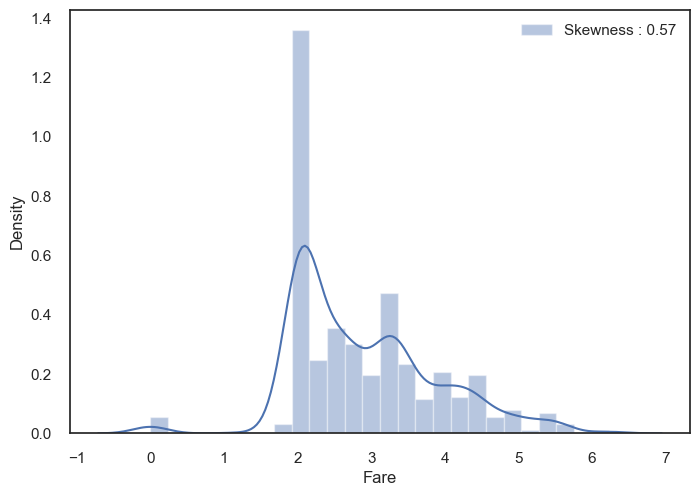

In [161]:
g = sns.distplot(dataset.Fare, color = 'b', label = 'Skewness : %.2f'%(dataset.Fare.skew()))
g.legend(loc = 'best')

#skewness 보정됨.

,Survived
Sex,
female,0.747573
male,0.190559


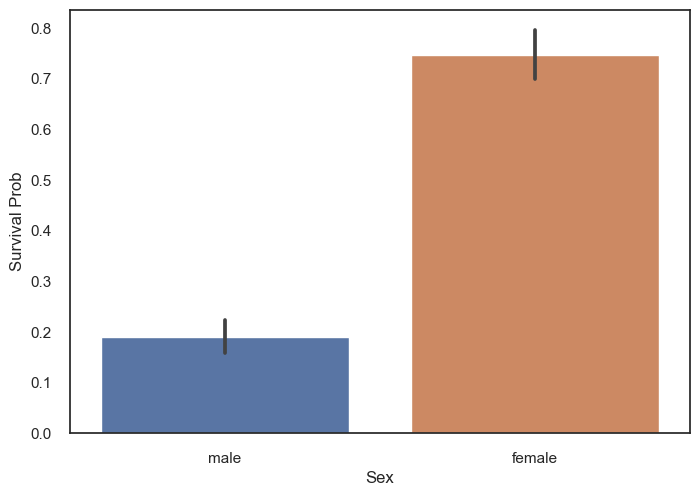

In [162]:
#3.2 categorical values

#sex

g = sns.barplot(x='Sex', y = 'Survived', data = train)
g = g.set_ylabel('Survival Prob')


train[['Sex','Survived']].groupby('Sex').mean()
#여자 생존률 높다

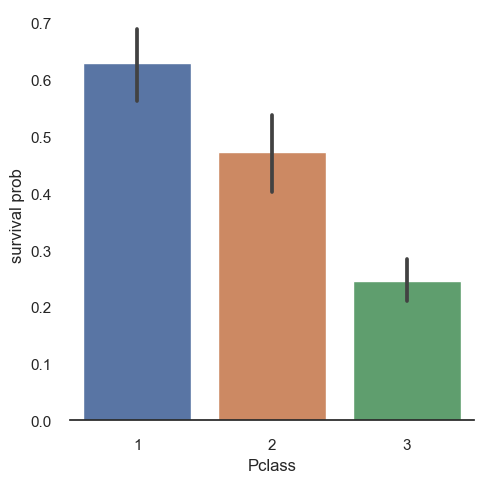

In [163]:
#pclass

g = sns.catplot(x = 'Pclass', y = 'Survived', data = train, kind = 'bar')
g.despine(left = True)
g = g.set_ylabels('survival prob')

# 등급이 높으면 생존률이 높다.

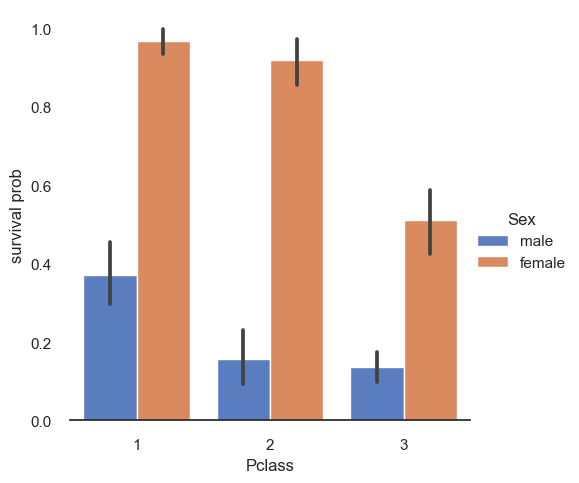

In [164]:
# explore pclass vs survived by sex

g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind='bar', palette = 'muted')
g.despine(left = True)
g = g.set_ylabels('survival prob')

# 성별에 관련 없이 높은등급일수록 생존확률이 높다.

In [165]:
# embarked

dataset.Embarked.isnull().sum()
dataset.Embarked = dataset.Embarked.fillna('S')

#최빈값으로 대체

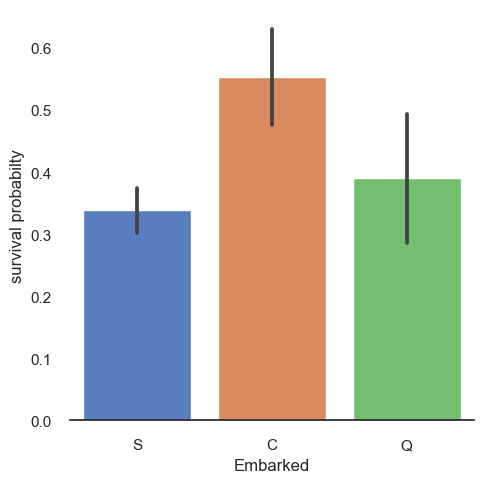

In [166]:
g = sns.catplot(x = 'Embarked', y = 'Survived', data = train, kind = 'bar', palette = 'muted')
g.despine(left= True)
g = g.set_ylabels('survival probabilty')

# 음... pclass와 연관지어볼까?

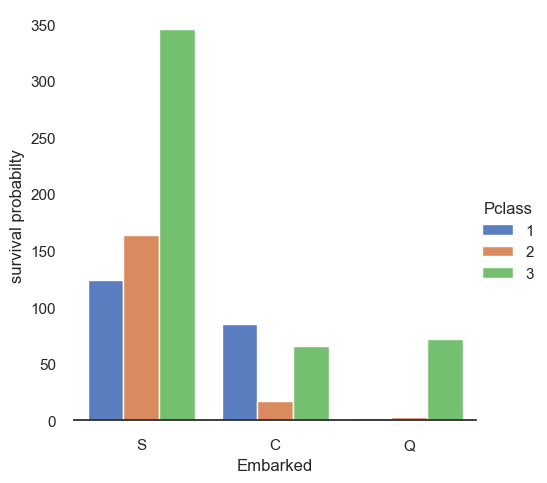

In [167]:
g = sns.catplot(x = 'Embarked', hue = 'Pclass', data = train, kind = 'count', palette = 'muted')
g.despine(left= True)
g = g.set_ylabels('survival probabilty')

# C에서 1등석 손님이 가장 많기 때문에 단순 embarked만의 효과로 보기는 어렵다.


In [168]:
#4. filling missing values

dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1007
Embarked          0
dtype: int64

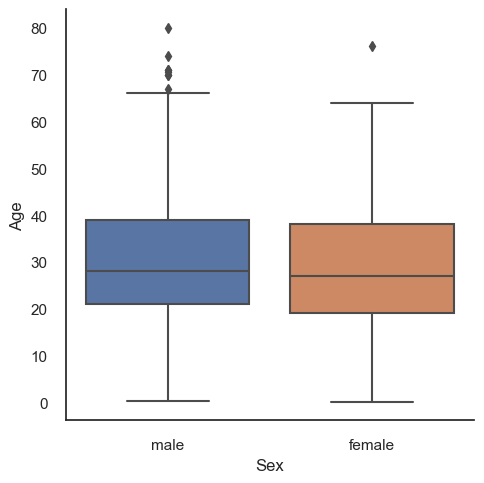

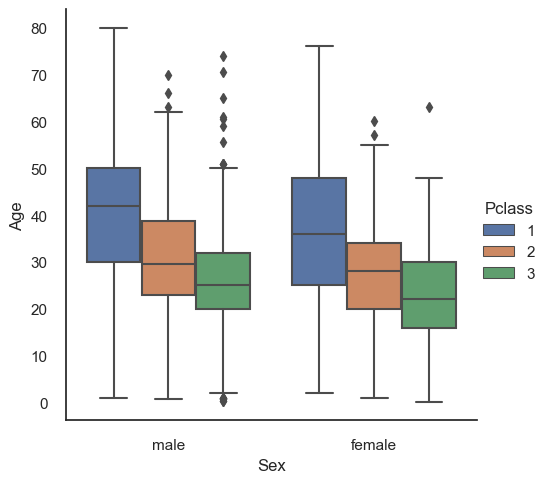

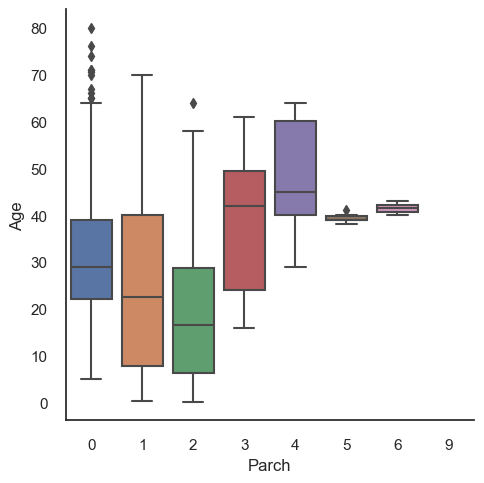

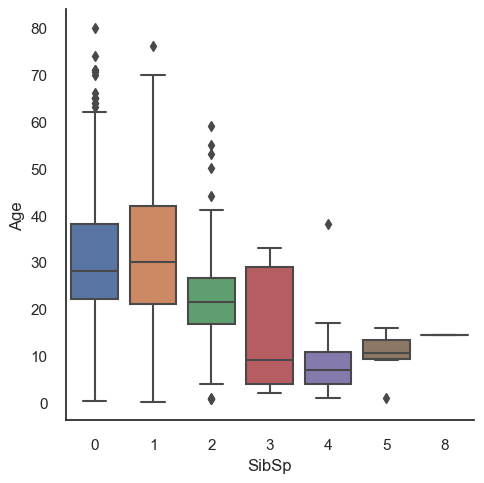

In [169]:
# 4.1 age

g = sns.catplot(y = 'Age',x = 'Sex', data = dataset, kind = 'box')
g = sns.catplot(y = 'Age',x = 'Sex', hue= 'Pclass', data = dataset, kind = 'box')
g = sns.catplot(y = 'Age',x = 'Parch', data = dataset, kind = 'box')
g = sns.catplot(y = 'Age',x = 'SibSp', data = dataset, kind = 'box')

In [170]:
# convert sex into categorical value 0 for male and 1 for female

dataset.Sex = dataset.Sex.map({'male' : 0, 'female' : 1})

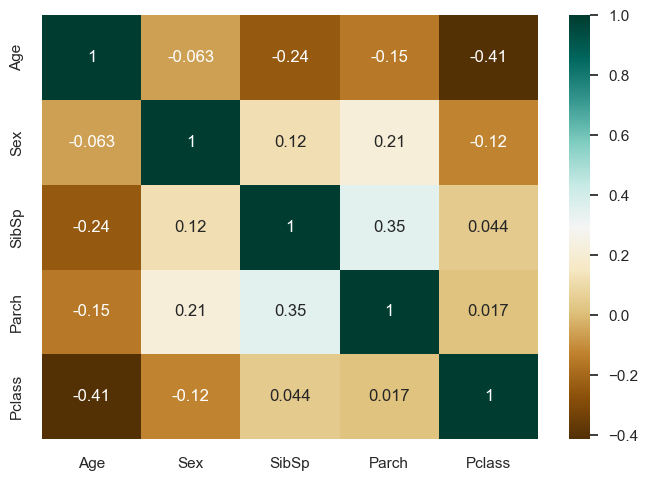

In [171]:
g = sns.heatmap(dataset[['Age', 'Sex', 'SibSp','Parch','Pclass']].corr(), cmap = 'BrBG', annot = True)

In [172]:
# Age 결측값 대체 전략 : 동일 Pclass, ParCh and SibSp의 median으로 채우자.

index_NaN_age = list(dataset['Age'][dataset['Age'].isnull()].index)

for i in index_NaN_age:
    age_med = dataset.Age.median()
    age_pred = dataset.Age[((dataset.SibSp == dataset.iloc[i]['SibSp']) & (dataset.Parch == dataset.iloc[i]['Parch']) &
                            (dataset.Pclass == dataset.iloc[i]['Pclass']))].median()
    
    if not np.isnan(age_pred):
        dataset.Age.iloc[i] = age_pred
    else : 
        dataset.Age.iloc[i] = age_med
        

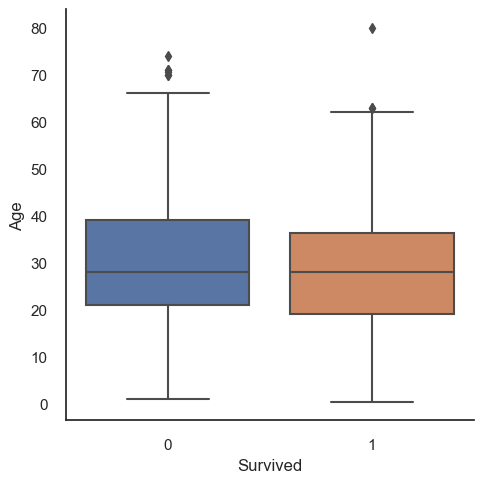

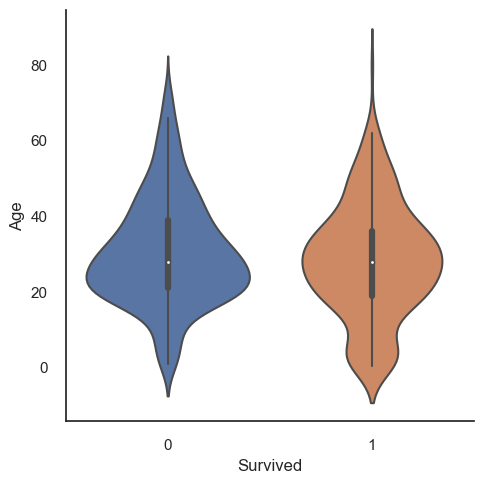

In [173]:
g = sns.catplot(x= 'Survived', y = 'Age', data = train, kind = 'box')
g = sns.catplot(x= 'Survived', y = 'Age', data = train, kind = 'violin')

In [174]:
# 5 feature engineering
# 5.1 name / title

dataset.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [175]:
# get title from name

dataset_title = [i.split(',')[1].split('.')[0].strip() for i in dataset.Name]
dataset['Title'] = pd.Series(dataset_title)
dataset.Title.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

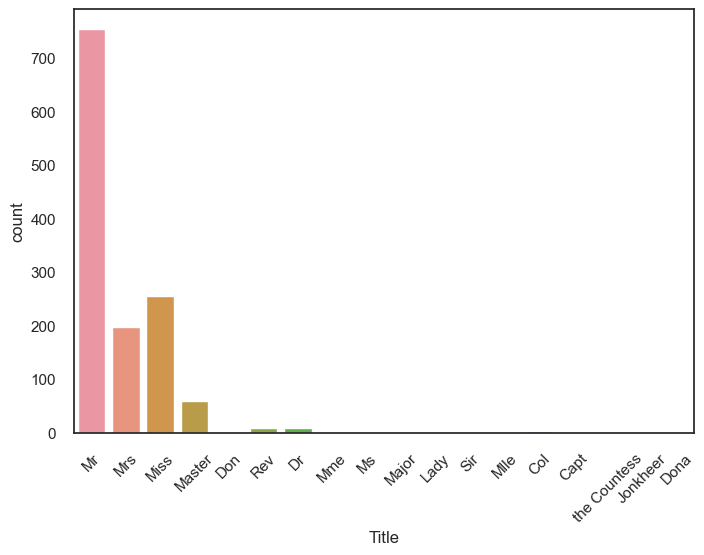

In [176]:
g = sns.countplot(x = 'Title', data = dataset)
g = plt.setp(g.get_xticklabels(), rotation = 45)

In [177]:
# mr mrs miss rare 로 변환하자

dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess', 'Countess' ,'Capt','Col','Don','Dr','Major',
                                             'Rev','Sir','Jonkheer','Dona'], 'Rare')

dataset['Title'] = dataset['Title'].map({'Master' : 0, 'Miss' : 1, 'Ms' : 1, 'Mme' : 1, 'Mlle':1, 'Mrs':1,
                                         'Mr':2, 'Rare':3})
dataset['Title'] = dataset['Title'].astype(int)

[Text(0, 0, 'Master'),
 Text(1, 0, 'Miss/Ms/Mme/Mlle/Mrs'),
 Text(2, 0, 'Mr'),
 Text(3, 0, 'Rare')]

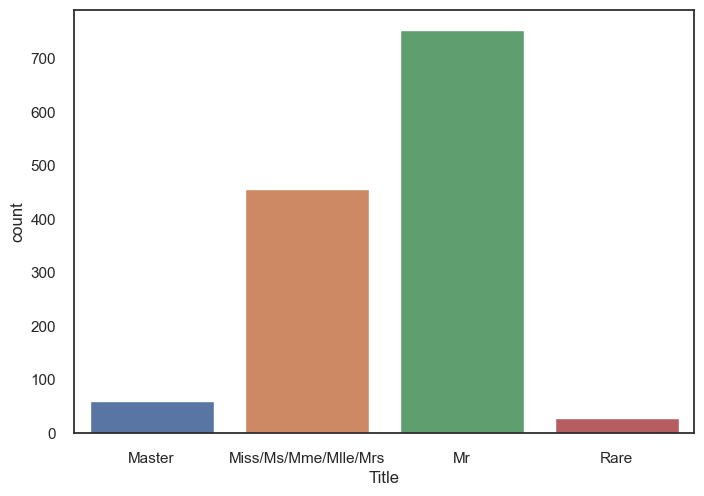

In [178]:
g = sns.countplot(x = 'Title', data = dataset)
g.set_xticklabels(['Master', 'Miss/Ms/Mme/Mlle/Mrs','Mr','Rare'])

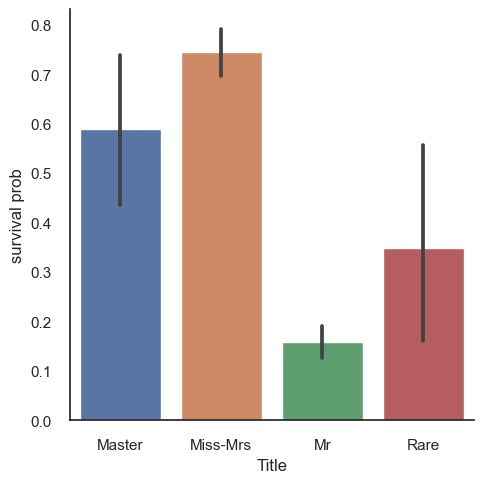

In [179]:
g = sns.catplot(x = 'Title', y = 'Survived', data = dataset, kind = 'bar')
g = g.set_xticklabels(['Master', 'Miss-Mrs','Mr','Rare'])
g = g.set_ylabels('survival prob')

#여자먼저

In [180]:
# drop name variavble : 빨거 다빨았음

dataset.drop(labels = 'Name', axis = 1, inplace = True)

In [181]:
# Family Size

dataset['Fsize'] = dataset.SibSp + dataset.Parch + 1


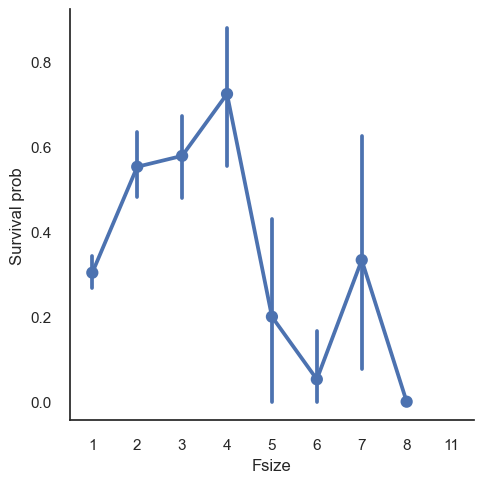

In [182]:
g = sns.catplot(x = 'Fsize', y = 'Survived', data = dataset, kind = 'point')
g = g.set_ylabels('Survival prob')

#fsize가 234일때 가장 높은 생존률

In [183]:
# Fsize의 더미변수화?

dataset['Single'] = dataset['Fsize'].map(lambda s : 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s : 1 if s == 2 else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s : 1 if s == 3 or 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s : 1 if s >= 5 else 0)


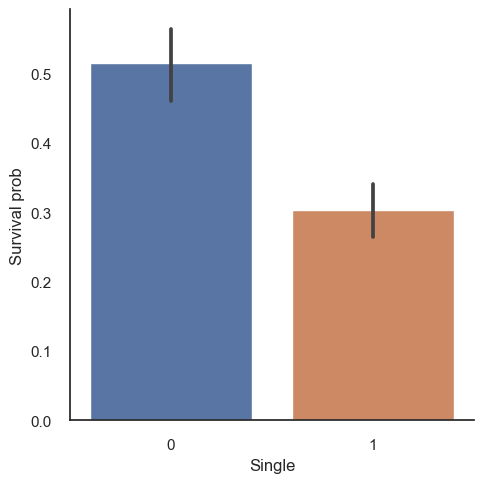

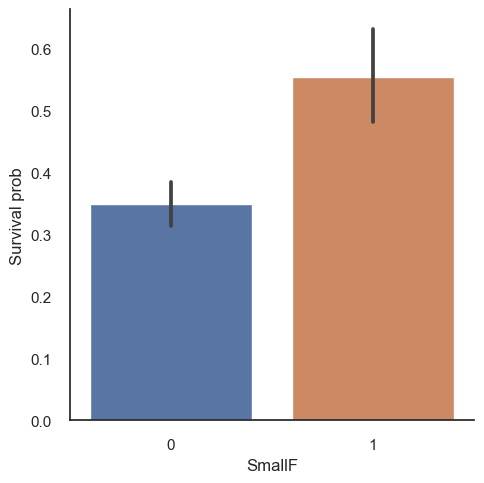

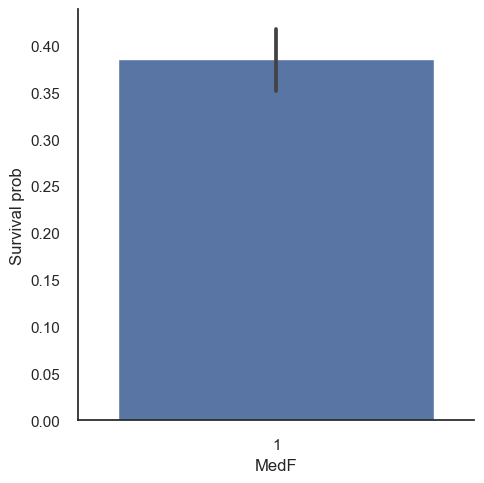

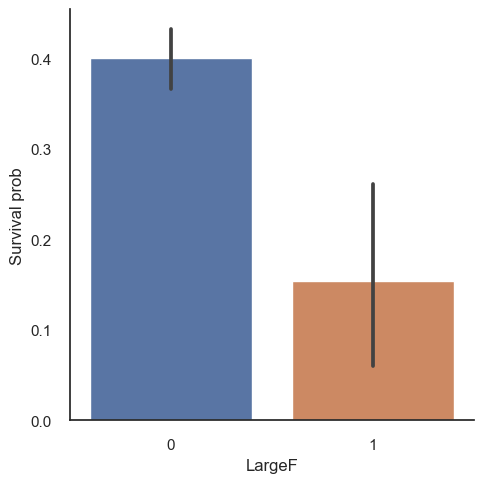

In [184]:
g = sns.catplot(x = 'Single', y = 'Survived', data = dataset, kind = 'bar')
g = g.set_ylabels('Survival prob')
g = sns.catplot(x = 'SmallF', y = 'Survived', data = dataset, kind = 'bar')
g = g.set_ylabels('Survival prob')
g = sns.catplot(x = 'MedF', y = 'Survived', data = dataset, kind = 'bar')
g = g.set_ylabels('Survival prob')
g = sns.catplot(x = 'LargeF', y = 'Survived', data = dataset, kind = 'bar')
g = g.set_ylabels('Survival prob')

In [185]:
# convert to indicator values title and embarked
dataste = pd.get_dummies(dataset, columns = ['Title'])
dataste = pd.get_dummies(dataset, columns = ['Embarked'], prefix = 'Em')

In [186]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Single,SmallF,MedF,LargeF
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,S,2,2,0,1,1,0
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,C,1,2,0,1,1,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,1,1,0,1,0
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,S,1,2,0,1,1,0
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,S,2,1,1,0,1,0


In [187]:
# 5.3 cabin : 결측값이 많다.

dataset['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin']])

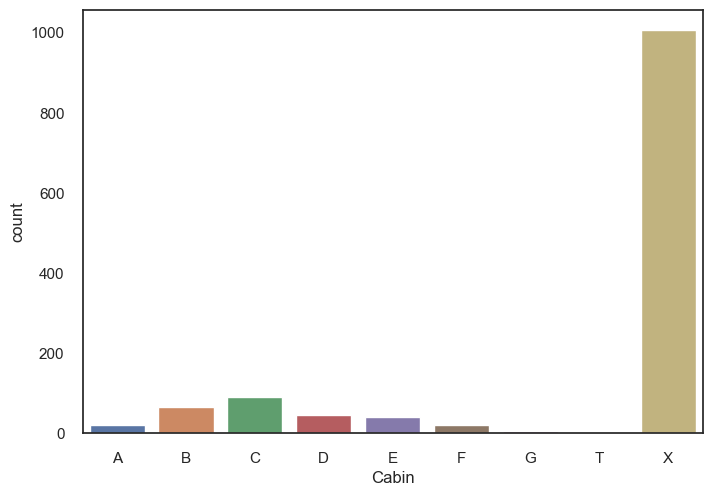

In [188]:
g = sns.countplot(x ='Cabin', data = dataset, order = ['A','B','C','D','E','F','G','T','X'])

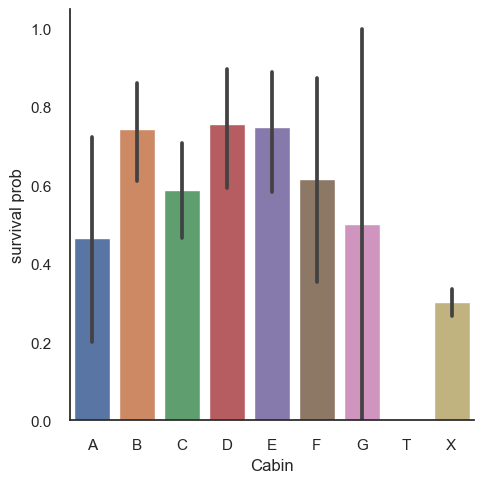

In [189]:
#Cabin에 따른 생존률

g = sns.catplot(x = 'Cabin', y = 'Survived', data = dataset, kind = 'bar', order = ['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels('survival prob')

dataset = pd.get_dummies(dataset, columns = ['Cabin'], prefix = 'Cabin')

In [190]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,LargeF,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,S,...,0,False,False,False,False,False,False,False,False,True
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C,...,0,False,False,True,False,False,False,False,False,False
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,S,...,0,False,False,False,False,False,False,False,False,True
3,4,1.0,1,1,35.0,1,0,113803,3.972177,S,...,0,False,False,True,False,False,False,False,False,False
4,5,0.0,3,0,35.0,0,0,373450,2.085672,S,...,0,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,0,25.0,0,0,A.5. 3236,2.085672,S,...,0,False,False,False,False,False,False,False,False,True
1295,1306,NaN,1,1,39.0,0,0,PC 17758,4.690430,C,...,0,False,False,True,False,False,False,False,False,False
1296,1307,NaN,3,0,38.5,0,0,SOTON/O.Q. 3101262,1.981001,S,...,0,False,False,False,False,False,False,False,False,True
1297,1308,NaN,3,0,25.0,0,0,359309,2.085672,S,...,0,False,False,False,False,False,False,False,False,True


In [191]:
#5.4 ticket : prefix 분리

Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit():
        Ticket.append(i.replace('.','').replace('/','').strip().split(' ')[0])
    else : Ticket.append('X')

dataset['Ticket'] = Ticket
dataset['Ticket'].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [192]:
dataset = pd.get_dummies(dataset, columns = ['Ticket'], prefix = 'T')

In [193]:
dataset['Pclass'] = dataset["Pclass"].astype('category')
dataset = pd.get_dummies(dataset, columns = ['Pclass'], prefix = 'Pc')

In [194]:
dataset.drop(labels = ['PassengerId'], axis = 1, inplace = True)
dataset = pd.get_dummies(dataset, columns = ['Embarked'], prefix = 'Em')

In [195]:
# 6 modeling
# separate train dataset and test dataset

train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels = ['Survived'], axis = 1, inplace = True)

In [222]:
## separate train features and and label

train['Survived'] = train['Survived'].astype(int)
Y_train = train['Survived']
X_train = train.drop(labels = ['Survived'], axis = 1)

In [197]:
# 6.1 simple modeling
# 6.1.1 cross validate models
# cross validate model with Kfold stratified cross val

kfold = StratifiedKFold(n_splits= 10) 
# stratified : y값의 비율을 유지하며 자름

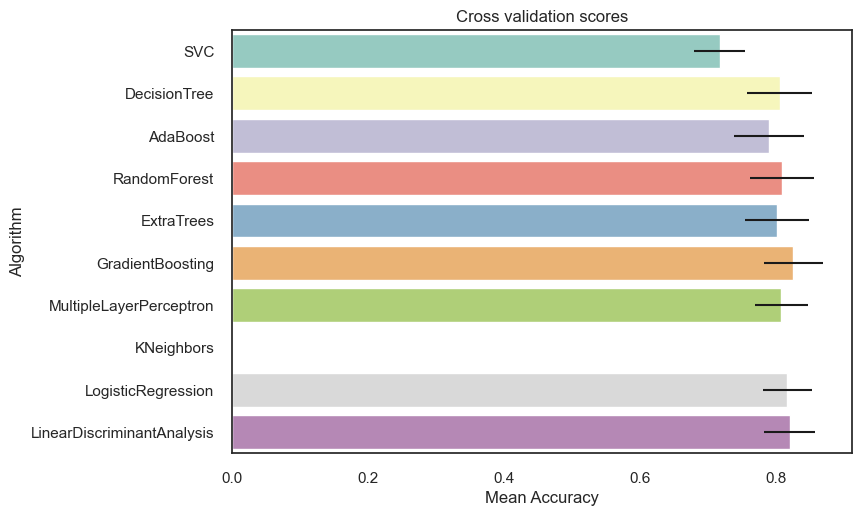

In [213]:
# modeling step test differents algorithms

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), 
                                      random_state=random_state, learning_rate = 0.1))
#adaboost?
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = 'accuracy',
                                      cv = kfold, n_jobs = 4)) #n_jobs? 사용 cpu 수

cv_means = []
cv_std =[]


for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CrossValMeans' : cv_means, 'CrossValerror' : cv_std, 'Algorithm' : ['SVC', 'DecisionTree','AdaBoost',
                                                                                            'RandomForest' ,'ExtraTrees','GradientBoosting',
                                                                                            'MultipleLayerPerceptron', 'KNeighbors','LogisticRegression',
                                                                                            'LinearDiscriminantAnalysis']})

g = sns.barplot(x = 'CrossValMeans', y =  'Algorithm', data = cv_res, palette = 'Set3', orient = 'h', **{'xerr' : cv_std})
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation scores')





In [229]:
# Gradient Boosting, LinearDiscrimiantAnalysis, RandomForest 선정하자.(내거기준)

# 6.1.2 hyperparameter tunning for best models

### meta modeling with adaboost, rf, extratrees and GradientBoosting

#gradient boosting
GBC = GradientBoostingClassifier()
GB_param_grid = {'loss' : ["log_loss"],
                 'n_estimators' : [100,200,300],
                 'learning_rate' : [0.1, 0.05, 0.01],
                 'max_depth' : [4,8],
                 'min_samples_leaf' : [100, 150],
                 'max_features' : [0.3, 0.1]}

gsGBC = GridSearchCV(GBC, param_grid = GB_param_grid, cv = kfold, scoring = 'accuracy', n_jobs= 4, verbose = 1)
gsGBC.fit(X_train, Y_train)
GBC_best = gsGBC.best_estimator_
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8263023493360573

In [226]:
# LinearDiscrimiantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA_param_grid = {'solver' : ['svd', 'lsqr','eigen']}
gsLDA = GridSearchCV(LDA, param_grid=LDA_param_grid ,cv= kfold, scoring = 'accuracy',
                     n_jobs= 4, verbose = 1)
gsLDA.fit(X_train, Y_train)
LDA_best = gsLDA.best_estimator_
gsLDA.best_score_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


0.820658835546476

In [231]:
# RandomForestClassifier

RFC = RandomForestClassifier()
RFC_param_grid = {'n_estimators' : [100,200,300],
                  'max_depth' :[5, 10, 15],
                  'min_samples_split':[2,4,6],
                  'min_samples_leaf' :[1,2,3],
                  }
gsRFC = GridSearchCV(RFC, RFC_param_grid, cv = kfold, scoring = 'accuracy',
                     n_jobs = 4, verbose = 1)
gsRFC.fit(X_train, Y_train)
RFC_best = gsRFC.best_estimator_
gsRFC.best_score_

Fitting 10 folds for each of 81 candidates, totalling 810 fits


0.8342824310520941

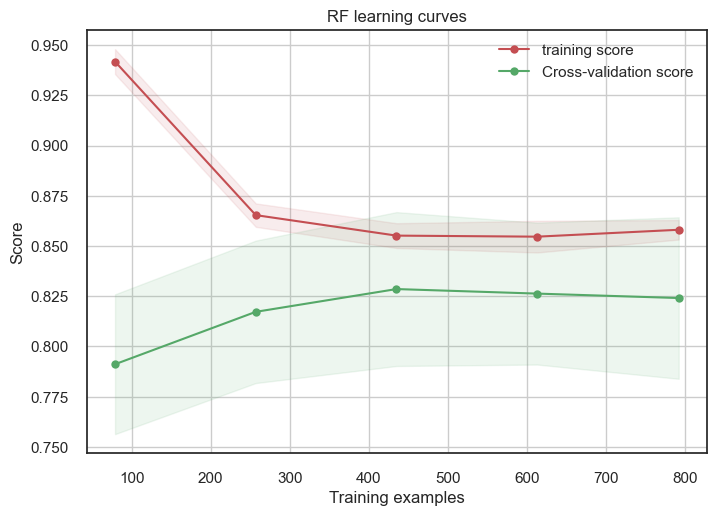

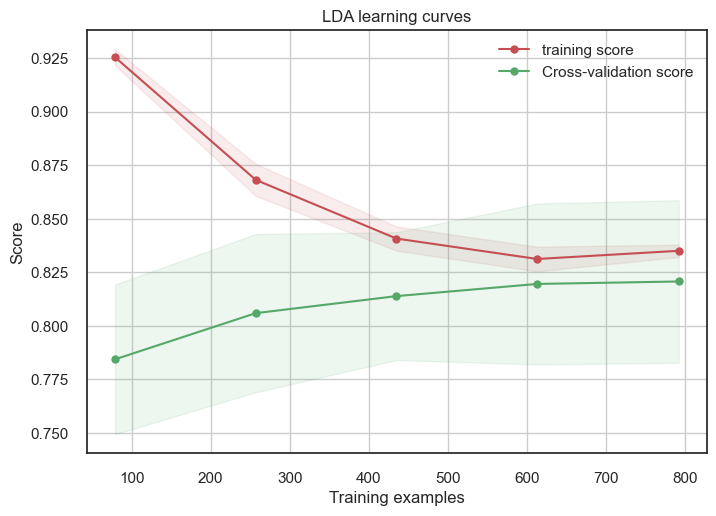

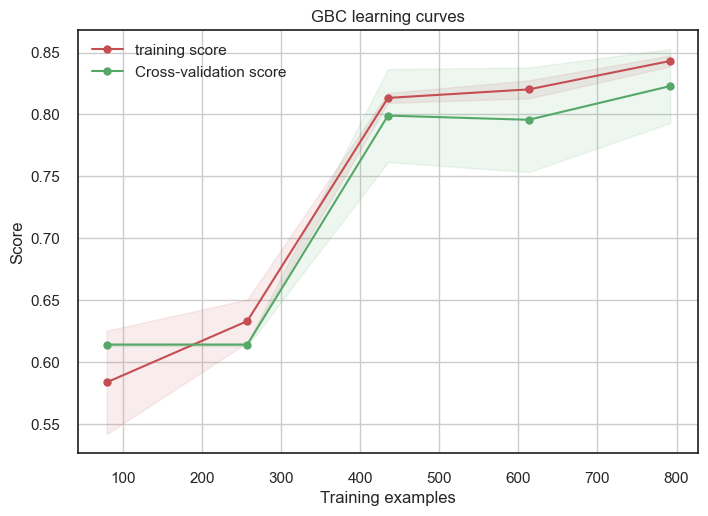

In [234]:
def plot_learning_curve(estimator, title, X,y, ylim = None, cv = None,
                        n_jobs = -1, train_sizes = np.linspace(.1, 1.0, 5)):
    "generate a simple plot of the test and training learning curve"

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1,
                     color = 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1,
                     color = 'g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', label = 'training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color ='g',
             label = 'Cross-validation score')
    plt.legend(loc = 'best')
    return plt

g = plot_learning_curve(gsRFC.best_estimator_, 'RF learning curves', X_train, Y_train, cv = kfold)
g = plot_learning_curve(gsLDA.best_estimator_, 'LDA learning curves', X_train, Y_train, cv = kfold)
g = plot_learning_curve(gsGBC.best_estimator_, 'GBC learning curves', X_train, Y_train, cv = kfold)

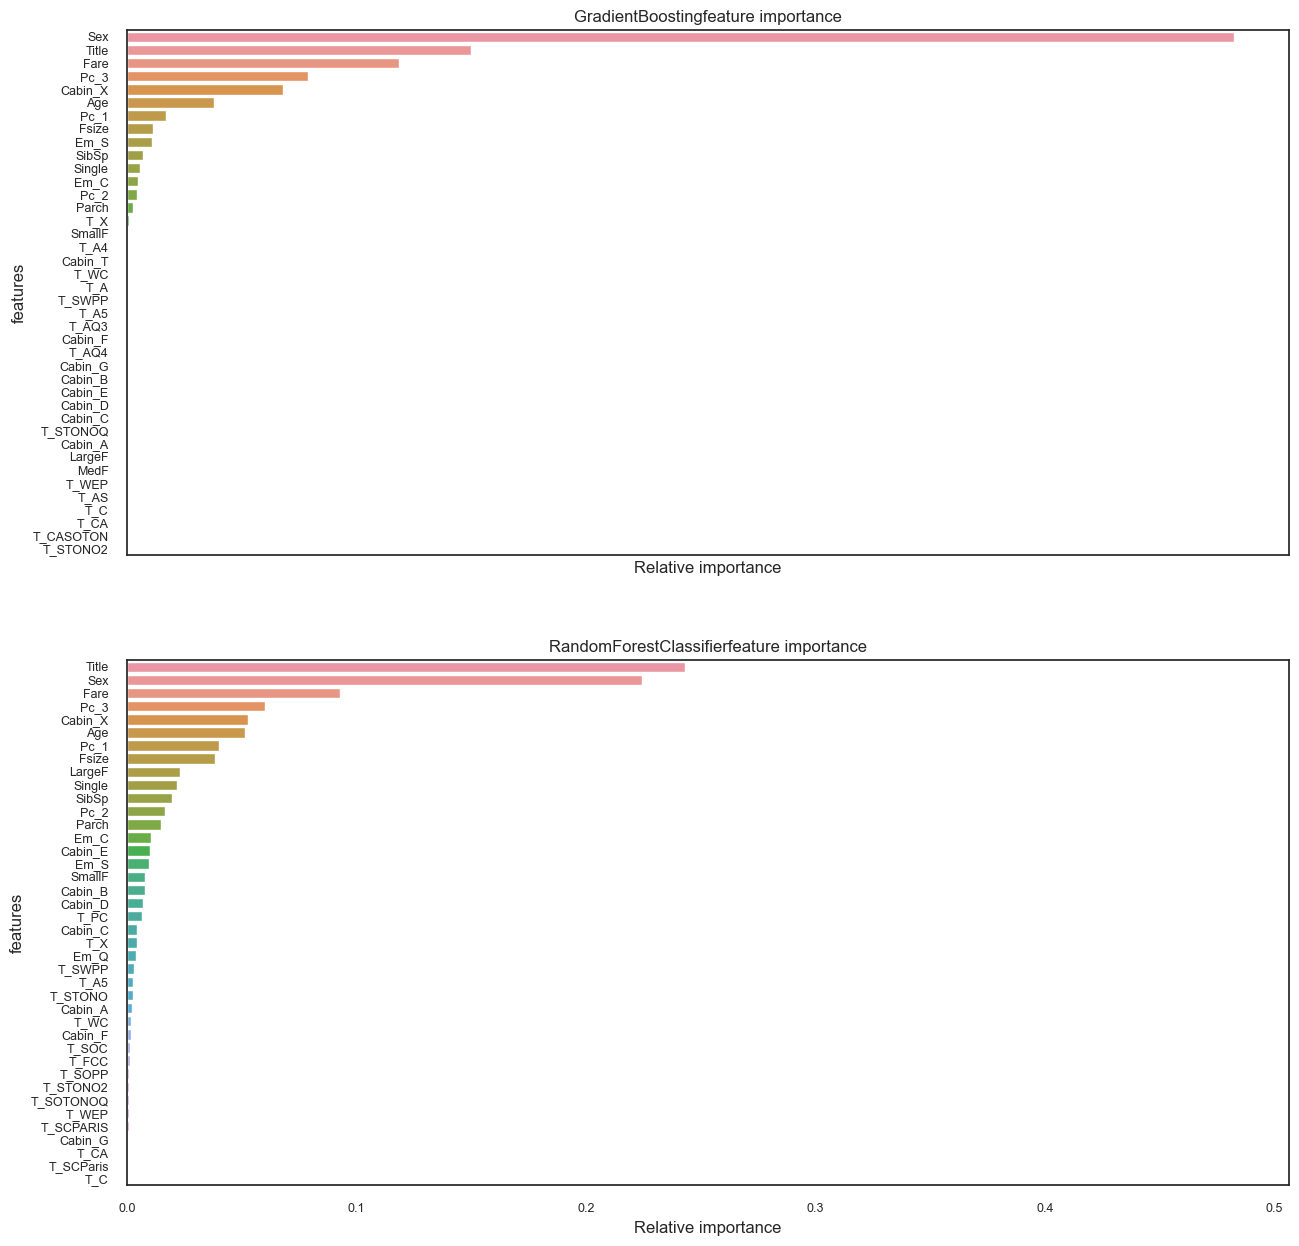

In [236]:
# feature importance of tree based classifiers

nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows, ncols, sharex = 'all', figsize = (15,15))

names_classifiers = [("GradientBoosting", GBC_best), ("RandomForestClassifier", RFC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y = X_train.columns[indices][:40], x= classifier.feature_importances_[indices][:40],
                        orient='h', ax = axes[row])
        g.set_xlabel('Relative importance', fontsize =12)
        g.set_ylabel('features', fontsize =12)
        g.tick_params(labelsize= 9)
        g.set_title(name + 'feature importance')
        nclassifier += 1

In [241]:
'''
중요하게 나타난 특징:
title, sex, fare, pc, age

survival은 age(age, master), sex(sex, title_2), familysize(sibsp, parch, fsize..)
 and social standing(pc1, pc2, pc3, fare)
'''

test_survived_rfc = pd.Series(RFC_best.predict(test), name = 'RFC')
test_survived_lda = pd.Series(LDA_best.predict(test), name = 'LDA')
test_survived_gbc = pd.Series(GBC_best.predict(test), name = 'GBC')

#concatenate all results
ensemble_results = pd.concat([test_survived_rfc, test_survived_lda, test_survived_gbc], 
                             axis = 1)




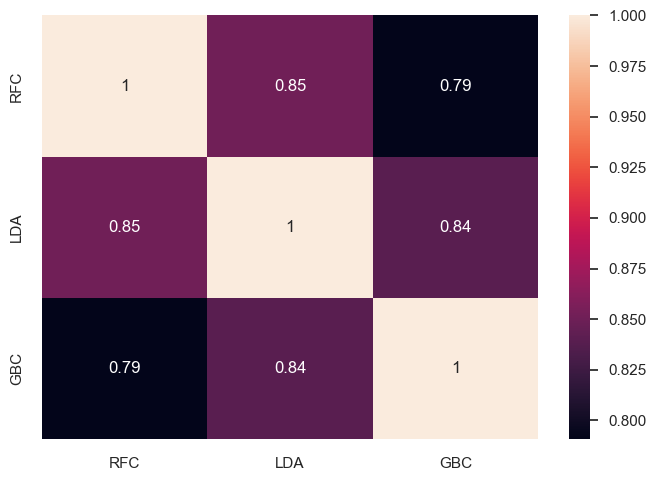

In [244]:
g = sns.heatmap(ensemble_results.corr(), annot = True)

In [247]:
# combining and voting

votingC = VotingClassifier(estimators = [('rfc', RFC_best), ('gbc', GBC_best),
                                         ('lda', LDA_best)], voting=  'soft', n_jobs =4)
votingC= votingC.fit(X_train, Y_train)

In [249]:
#6.3 prediction

test_survived = pd.Series(votingC.predict(test), name = 'Survived')
results = pd.concat([IDtest, test_survived], axis = 1)
results.to_csv('ensemble_python_voting.csv', index = False)